In [1]:
# fmt: off
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext lab_black
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from mls_scf_tools.mls_pint import ureg
plt.style.use("mls_scf")
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]
# fmt: on

In [2]:
%autoreload 2
import dualpy as dp

In [3]:
from dualpy.dual_helpers import get_unit_conversion_scale as gucs

s = gucs(ureg.km * ureg.s / ureg.hour, ureg.m)
print(s)

0.2777777777777778 hour * meter / kilometer / second


In [4]:
t = np.arange(100) * ureg.s
t = dp.seed(t, "t")

In [5]:
v = 10.0 * ureg.m / ureg.s
v1 = v
v2 = v.to(ureg.km / ureg.hour)

In [6]:
x1 = v1 * t
x2 = v2 * t

In [7]:
print(x1.jacobians, x1.units)
print(x2.jacobians, x2.units)

{'t': Jacobian of type <class 'dualpy.diagonal_jacobians.DiagonalJacobian'>
Dependent shape is (100,) <100>
Independent shape is (100,) <100>
Combined they are (100, 100) <10000>
Dummies are (1,) and (1,)
Units are d<meter>/d<second> = <meter / second>
data is (100,)} meter
{'t': Jacobian of type <class 'dualpy.diagonal_jacobians.DiagonalJacobian'>
Dependent shape is (100,) <100>
Independent shape is (100,) <100>
Combined they are (100, 100) <10000>
Dummies are (1,) and (1,)
Units are d<kilometer * second / hour>/d<second> = <kilometer / hour>
data is (100,)} kilometer * second / hour


In [8]:
j1 = x1.jacobians["t"].extract_diagonal()
j2 = x2.jacobians["t"].extract_diagonal()

In [9]:
print(j1)
print(j2)
print(j2.to_base_units())

[10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] meter / second
[36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36.0 36

In [10]:
js = x1.jacobians["t"] + x2.jacobians["t"]
print(js)
print(js.extract_diagonal())

Jacobian of type <class 'dualpy.diagonal_jacobians.DiagonalJacobian'>
Dependent shape is (100,) <100>
Independent shape is (100,) <100>
Combined they are (100, 100) <10000>
Dummies are (1,) and (1,)
Units are d<meter>/d<second> = <meter / second>
data is (100,)
[20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0 20.0] meter / second


In [11]:
x = np.where(t > 50.0 * ureg.s, v1 * t, v2 * t)

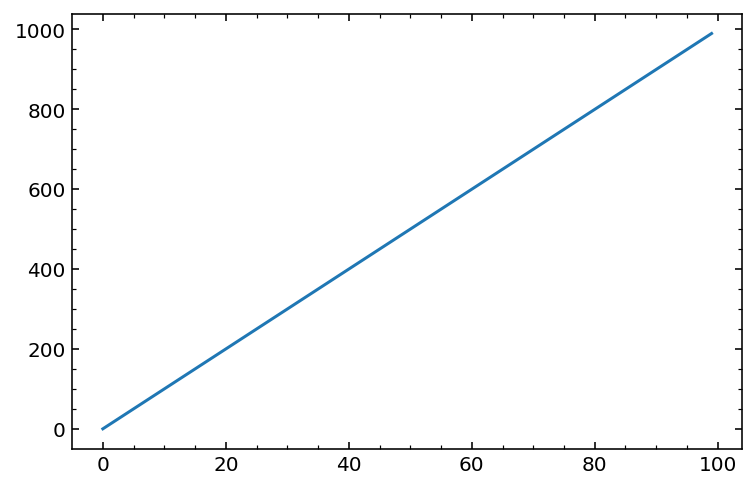

In [12]:
plt.plot(x)

In [13]:
j = x.jacobians["t"].extract_diagonal().to_base_units()

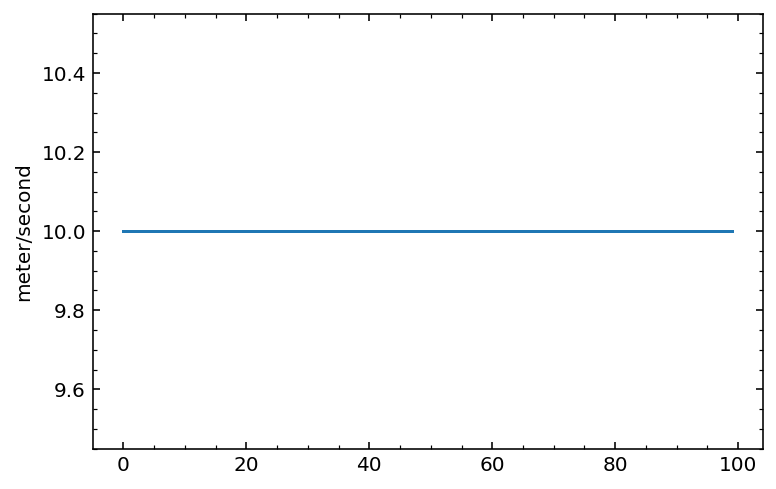

In [14]:
plt.plot(j)